In [313]:
import numpy as np
from src.utils import *
from matplotlib import pyplot as plt

In [314]:
imgdims = (800, 800, 3)
patchdims = (32, 32, 3)
outputdims = (200, 200, 1)
pad = 0

In [4]:
img = load_data("data/flowers/Images/1.jpg", dims=imgdims, normalize=True)

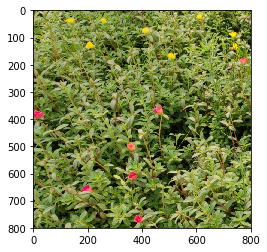

In [5]:
plt.imshow(img)

In [29]:
dimg = load_dotlabel("data/flowers/image1/1.jpg", imgdims=imgdims)

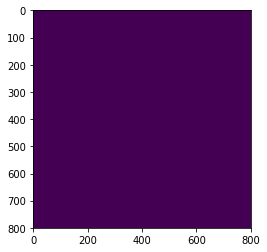

In [30]:
plt.imshow(dimg)

In [31]:
out = sample_exemplar(inputs=(img,dimg), patchdims=patchdims, augment=True)

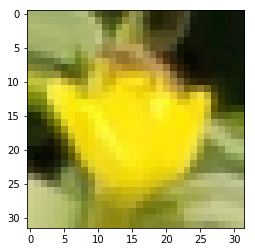

In [32]:
plt.imshow(out[0])

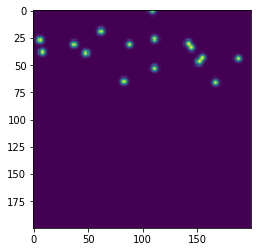

In [24]:
plt.imshow(out[1])

In [33]:
import xml.etree.ElementTree as ET

In [280]:
root = ET.parse('data/flowers/Markers/CellCounter_6.xml').getroot()

In [281]:
file_name = root.find('Image_Properties/Image_Filename').text

In [283]:
file_name

'6.jpg'

In [219]:
for type_tag in root.findall('Marker_Data/Marker_Type'):
    value = type_tag.find('Type').text
    if not ( value is "1" or value is "2"):
        continue
    
    label_img = np.zeros((1585, 1585, 3))
    
    for marker in type_tag.findall('Marker'):
        x = int(marker.find('MarkerX').text)
        y = int(marker.find('MarkerY').text)
        label_img[y][x][:]= [1,1,1] 
    
    plt.imsave("data/flowers/image" + str(value) + "/" + "sup.jpg", label_img, format="jpg")

In [221]:
img = plt.imread("data/flowers/image2/sup.jpg")

In [333]:
images_dir = "data/flowers_full/Images_split4/"
annotations_dir = "data/flowers_full/Markers_split4/"

In [334]:
import os

In [335]:
annotations_list = os.listdir(annotations_dir)

In [336]:
annotations_list

['CellCounter_2_B.xml',
 'CellCounter_8_C.xml',
 'CellCounter_9_D.xml',
 'CellCounter_2_C.xml',
 'CellCounter_15_A.xml',
 'CellCounter_2_A.xml',
 'CellCounter_4_D.xml',
 'CellCounter_10_A.xml',
 'CellCounter_10_B.xml',
 'CellCounter_9_B.xml',
 'CellCounter_1_A.xml',
 'CellCounter_7_C.xml',
 'CellCounter_14_B.xml',
 'CellCounter_5_A.xml',
 'CellCounter_14_C.xml',
 'CellCounter_5_D.xml',
 'CellCounter_11_D.xml',
 'CellCounter_3_A.xml',
 'CellCounter_7_B.xml',
 'CellCounter_12_A.xml',
 'CellCounter_8_B.xml',
 'CellCounter_6_C.xml',
 'CellCounter_7_A.xml',
 'CellCounter_1_B.xml',
 'CellCounter_6_D.xml',
 'CellCounter_3_C.xml',
 'CellCounter_3_D.xml',
 'CellCounter_9_C.xml',
 'CellCounter_12_D.xml',
 'CellCounter_9_A.xml',
 'CellCounter_13_A.xml',
 'CellCounter_6_A.xml',
 'CellCounter_1_C.xml',
 'CellCounter_13_C.xml',
 'CellCounter_13_D.xml',
 'CellCounter_7_D.xml',
 'CellCounter_14_D.xml',
 'CellCounter_8_A.xml',
 'CellCounter_1_D.xml',
 'CellCounter_4_A.xml',
 'CellCounter_8_D.xml',
 'Ce

In [344]:
def anno(annotation_path, image_dir, save_path="data/flowers_full/"):
    
    # parse the xml
    root = ET.parse(annotation_path).getroot()
    
    # get corresponding image filename and path
    img_filename = annotation_path.split("/")[-1][12:-3] + "jpg"
    img_path = os.path.join(image_dir, img_filename)
    print(img_filename)
    
    for type_tag in root.findall('Marker_Data/Marker_Type'):
        
        # go through all the types of marker present in the xml
        value = type_tag.find('Type').text
        
        # we only consider maker 1 and 2
        if not ( value is "1" or value is "2"):
            continue

        label_img = np.zeros(plt.imread(img_path).shape)

        for marker in type_tag.findall('Marker'):
            x = int(marker.find('MarkerX').text)
            y = int(marker.find('MarkerY').text)
            label_img[y][x][:]= [1,1,1] 
        
        plt.imsave(os.path.join(save_path, ("image" + str(value)), img_filename), label_img, format="jpg")

In [345]:
for annotations_name in annotations_list:
    anno(os.path.join(annotations_dir, annotations_name), images_dir)

2_B.jpg
8_C.jpg
9_D.jpg
2_C.jpg
15_A.jpg
2_A.jpg
4_D.jpg
10_A.jpg
10_B.jpg
9_B.jpg
1_A.jpg
7_C.jpg
14_B.jpg
5_A.jpg
14_C.jpg
5_D.jpg
11_D.jpg
3_A.jpg
7_B.jpg
12_A.jpg
8_B.jpg
6_C.jpg
7_A.jpg
1_B.jpg
6_D.jpg
3_C.jpg
3_D.jpg
9_C.jpg
12_D.jpg
9_A.jpg
13_A.jpg
6_A.jpg
1_C.jpg
13_C.jpg
13_D.jpg
7_D.jpg
14_D.jpg
8_A.jpg
1_D.jpg
4_A.jpg
8_D.jpg
11_A.jpg
2_D.jpg
5_C.jpg
5_B.jpg
15_C.jpg
10_D.jpg
6_B.jpg
15_B.jpg
10_C.jpg
4_C.jpg
4_B.jpg
3_B.jpg
11_C.jpg
13_B.jpg
12_C.jpg
11_B.jpg
15_D.jpg
14_A.jpg
12_B.jpg


In [354]:
def make_data(idxs, flower_id):
    data = {
        'trn_lst': [],
        'trn_lb': [],
        'val_lst':[],
        'val_lb':[]
    }
    idxs = set(idxs)
    idx_complement = set(range(1,16)) - idxs
    for i in idxs:
        for split in ["A", "B", "C", "D"]:
            image_name = f"Images_split4/{i}_{split}.jpg"
            label_name = f"image{flower_id}/{i}_{split}.jpg"
            data['trn_lst'].append(image_name)
            data['trn_lb'].append(label_name)
    for i in idx_complement: 
        for split in ["A", "B", "C", "D"]:
            image_name = f"Images_split4/{i}_{split}.jpg"
            label_name = f"image{flower_id}/{i}_{split}.jpg"
            data['val_lst'].append(image_name)
            data['val_lb'].append(label_name)
    return data

In [ ]:
* 1-10 are from 8th
* 11-12 are from 25th
* 13-15 are from 30th

In [357]:
train_idx = [1, 2, 3, 4, 5, 6, 7, 11,13]

In [358]:
data = make_data(train_idx, 2)
np.savez("meta/flowers2", **data)

data = make_data(train_idx, 1)
np.savez("meta/flowers1", **data)

In [87]:
data = {}
data['trn_lst'] = [os.path.join("Images/", str(i)+".jpg") for i in range(1,15) if i is not 5]
data['trn_lb'] =  [os.path.join("image2/", str(i)+".jpg") for i in range(1,15) if i is not 5]
data['val_lst'] = [os.path.join("Images/", str(i)+".jpg") for i in range(15,21) if i is not 5]
data['val_lb'] = [os.path.join("image2/", str(i)+".jpg") for i in range(15,21) if i is not 5]
np.savez("meta/flowers2", **data)
data = {}
data['val_lst'] = [os.path.join("Images/", str(i)+".jpg") for i in range(15,21) if i is not 5]
data['val_lb'] = [os.path.join("image1/", str(i)+".jpg") for i in range(15,21) if i is not 5]
data['trn_lst'] = [os.path.join("Images/", str(i)+".jpg") for i in range(1,15) if i is not 5]
data['trn_lb'] =  [os.path.join("image1/", str(i)+".jpg") for i in range(1,15) if i is not 5]
np.savez("meta/flowers1", **data)

## Test split and save

In [22]:
imgdims = (800, 1067, 3)

In [75]:
img = scipy.misc.imread("data/flowers_full/Images/1.jpg", mode='RGB')

/share/apps/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


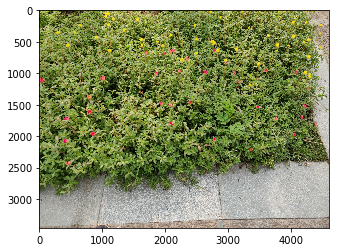

In [76]:
plt.imshow(img)

In [78]:
l, b, h = img.shape
# img_A = img[:, : l, :]
# img_B = img[:, b - l :, :]

# A | B
# -----
# C | D
img_A = img[: l // 2, : b // 2, :]
img_B = img[: l // 2, b // 2 :, :]
img_C = img[l // 2 :, : b // 2, :]
img_D = img[l // 2 :, b // 2 :, :]

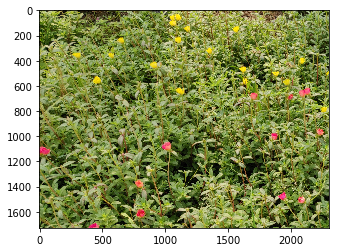

In [79]:
plt.imshow(img_A)

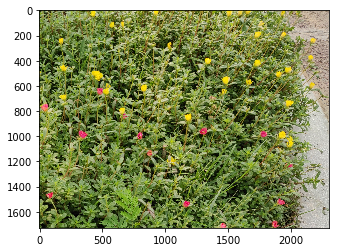

In [80]:
plt.imshow(img_B)

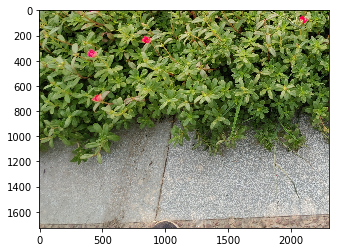

In [81]:
plt.imshow(img_C)

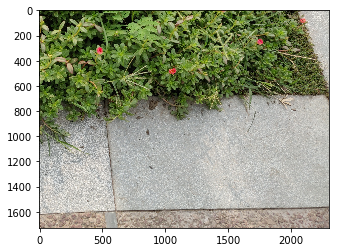

In [82]:
plt.imshow(img_D)

In [62]:
scipy.misc.imsave("data/flowers_full/Images_split/1_A.jpg", img_A)

/share/apps/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


/share/apps/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


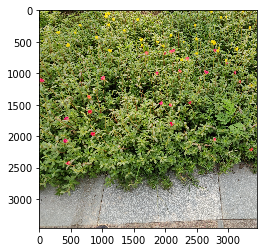

In [63]:
img = scipy.misc.imread("data/flowers_full/Images_split/1_A.jpg", mode='RGB')
plt.imshow(img)

## Split and save all full images

In [323]:
import glob

# For images with aspect ratio 4:3
imgdims = (800, 1067, 3)

read_base_path = "data/flowers_full/Images/"
save_base_path = "data/flowers_full/Images_split/"

In [324]:
for path in glob.glob(read_base_path + "*.jpg"):
    
    img = scipy.misc.imread(path, mode='RGB')
    
    l, b, h = img.shape
#     img_A = img[:, : l, :]
#     img_B = img[:, b - l :, :]
    
#     img_name = path.split('/')[-1].split('.')[0]
    
#     scipy.misc.imsave(save_base_path + img_name + "_A.jpg", img_A)
#     scipy.misc.imsave(save_base_path + img_name + "_B.jpg", img_B)
    print(l, b, h)

/share/apps/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3
3456 4608 3


## Splitting image into 4

In [255]:
import glob
import xml.etree.ElementTree as ET

read_base_path = "data/flowers_full/Images/"
save_base_path = "data/flowers_full/Images_split4/"
xml_read_base_path = "data/flowers_full/Markers/"
xml_write_base_path = "data/flowers_full/Markers_split4/"

In [256]:
for path in glob.glob(read_base_path + "*.jpg"):
    
    img = scipy.misc.imread(path, mode='RGB')
    
    l, b, h = img.shape
    
    # A | B
    # -----
    # C | D
    img_A = img[: l // 2, : b // 2, :]
    img_B = img[: l // 2, b // 2 :, :]
    img_C = img[l // 2 :, : b // 2, :]
    img_D = img[l // 2 :, b // 2 :, :]
    
    img_name = path.split('/')[-1].split('.')[0]
    
    scipy.misc.imsave(save_base_path + img_name + "_A.jpg", img_A)
    scipy.misc.imsave(save_base_path + img_name + "_B.jpg", img_B)
    scipy.misc.imsave(save_base_path + img_name + "_C.jpg", img_C)
    scipy.misc.imsave(save_base_path + img_name + "_D.jpg", img_D)
    
    xml_read_path = xml_read_base_path + "CellCounter_" + img_name + ".xml"
    
    # For img_A
    tree = ET.parse(xml_read_path)
    root = tree.getroot()
    
    for marker in root[1][1].findall('Marker'):
        if int(marker[0].text) >= b // 2 or int(marker[1].text) >= l // 2:
            root[1][1].remove(marker)
            
    for marker in root[1][2].findall('Marker'):
        if int(marker[0].text) >= b // 2 or int(marker[1].text) >= l // 2:
            root[1][2].remove(marker)
    
    xml_write_path = xml_write_base_path + "CellCounter_" + img_name + "_A.xml"
    tree.write(xml_write_path)
    
    # For img_B
    tree = ET.parse(xml_read_path)
    root = tree.getroot()
    
    for marker in root[1][1].findall('Marker'):
        if int(marker[0].text) < b // 2 or int(marker[1].text) >= l // 2:
            root[1][1].remove(marker)
        else:
            marker[0].text = str(int(marker[0].text) - b // 2)
            
    for marker in root[1][2].findall('Marker'):
        if int(marker[0].text) < b // 2 or int(marker[1].text) >= l // 2:
            root[1][2].remove(marker)
        else:
            marker[0].text = str(int(marker[0].text) - b // 2)
    
    xml_write_path = xml_write_base_path + "CellCounter_" + img_name + "_B.xml"
    tree.write(xml_write_path)
    
    # For img_C
    tree = ET.parse(xml_read_path)
    root = tree.getroot()
    
    for marker in root[1][1].findall('Marker'):
        if int(marker[0].text) >= b // 2 or int(marker[1].text) < l // 2:
            root[1][1].remove(marker)
        else:
            marker[1].text = str(int(marker[1].text) - l // 2)
            
    for marker in root[1][2].findall('Marker'):
        if int(marker[0].text) >= b // 2 or int(marker[1].text) < l // 2:
            root[1][2].remove(marker)
        else:
            marker[1].text = str(int(marker[1].text) - l // 2)
    
    xml_write_path = xml_write_base_path + "CellCounter_" + img_name + "_C.xml"
    tree.write(xml_write_path)
    
    # For img_D
    tree = ET.parse(xml_read_path)
    root = tree.getroot()
    
    for marker in root[1][1].findall('Marker'):
        if int(marker[0].text) < b // 2 or int(marker[1].text) < l // 2:
            root[1][1].remove(marker)
        else:
            marker[0].text = str(int(marker[0].text) - b // 2)
            marker[1].text = str(int(marker[1].text) - l // 2)
            
    for marker in root[1][2].findall('Marker'):
        if int(marker[0].text) < b // 2 or int(marker[1].text) < l // 2:
            root[1][2].remove(marker)
        else:
            marker[0].text = str(int(marker[0].text) - b // 2)
            marker[1].text = str(int(marker[1].text) - l // 2)
    
    xml_write_path = xml_write_base_path + "CellCounter_" + img_name + "_D.xml"
    tree.write(xml_write_path)

/share/apps/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/share/apps/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/share/apps/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/share/apps/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` inste

## Splitting XML files

In [203]:
import xml.etree.ElementTree as ET

In [310]:
tree = ET.parse("data/flowers_full/Markers_split4/CellCounter_12_D.xml")

In [311]:
root = tree.getroot()

In [312]:
i = 0
for marker in root[1][1].findall('Marker'):
    i += 1
for marker in root[1][2].findall('Marker'):
    i += 1
print(i)
# i = 0
# for marker in root[1][1].findall('Marker'):
#     i += 1
#     if i == 5:
#         marker[0].text = str(int(marker[0].text) // 2)
#         print(marker[0].text)
#     if i != 5:
#         root[1][1].remove(marker)
# i = 0
# for marker in root[1][1].findall('Marker'):
#     i += 1
# print(i)


180


In [230]:
tree.write("data/flowers_full/Markers_split4/CellCounter_1_A.xml")